In [ ]:
!pip install earthengine-api
!pip install geemap
!pip install rasterio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 69.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 75.5 MB/s eta 0:00:00


In [ ]:
from google.colab import auth
auth.authenticate_user()

import geemap
import ee

ee.Authenticate()
ee.Initialize(project='ee-carloseparantes01')

x = geemap.Map()
x

Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…

In [ ]:
center = x.center
longitude, latitude = center[1], center[0]
point = ee.Geometry.Point([longitude, latitude])
aoi = point.buffer(10000).bounds()

se2 = ee.ImageCollection('COPERNICUS/S2') \
    .filterDate("2024-01-01", "2024-12-31") \
    .filterBounds(aoi)

count = se2.size().getInfo()
print(f"Quantidade de imagens encontradas: {count}")

se2_median = se2.median().divide(5000)

se2_selected = se2_median.select(['B4', 'B3', 'B2', 'B8'])

task = ee.batch.Export.image.toDrive(
    image=se2_selected,
    description='Sentinel2_export',
    folder='nome_da_pasta_no_drive',
    fileNamePrefix='Sentinel2_1939',
    region=aoi.getInfo()['coordinates'],
    scale=10,
    crs='EPSG:4326'
)
task.start()

task.status()


Quantidade de imagens encontradas: 62


{'state': 'READY',
 'description': 'Sentinel2_export',
 'priority': 100,
 'creation_timestamp_ms': 1730635869038,
 'update_timestamp_ms': 1730635869038,
 'start_timestamp_ms': 0,
 'task_type': 'EXPORT_IMAGE',
 'id': '4AQPTLO3WNZUJR36QE75XFWH',
 'name': 'projects/ee-carloseparantes01/operations/4AQPTLO3WNZUJR36QE75XFWH'}

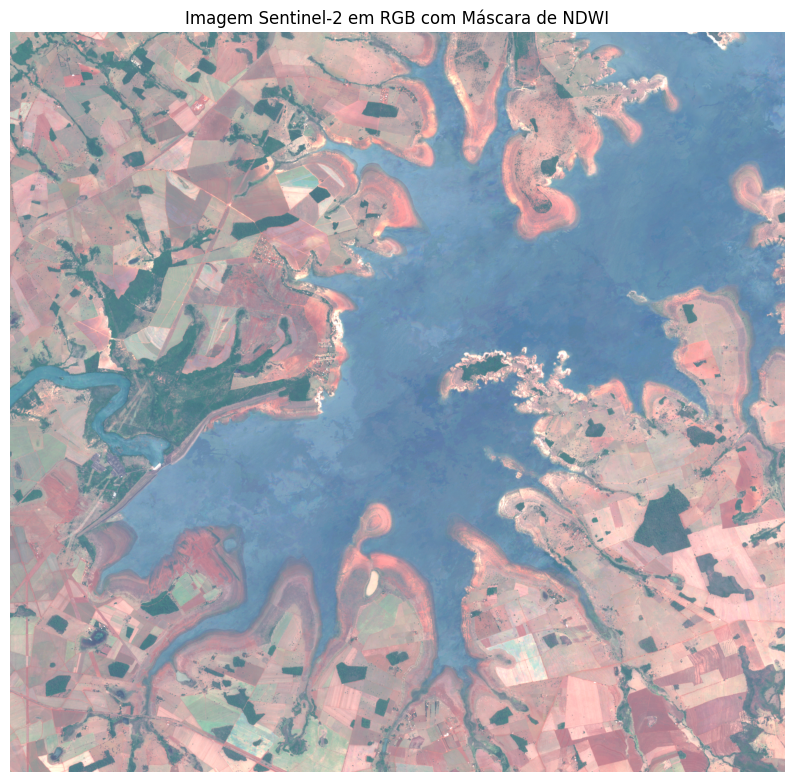

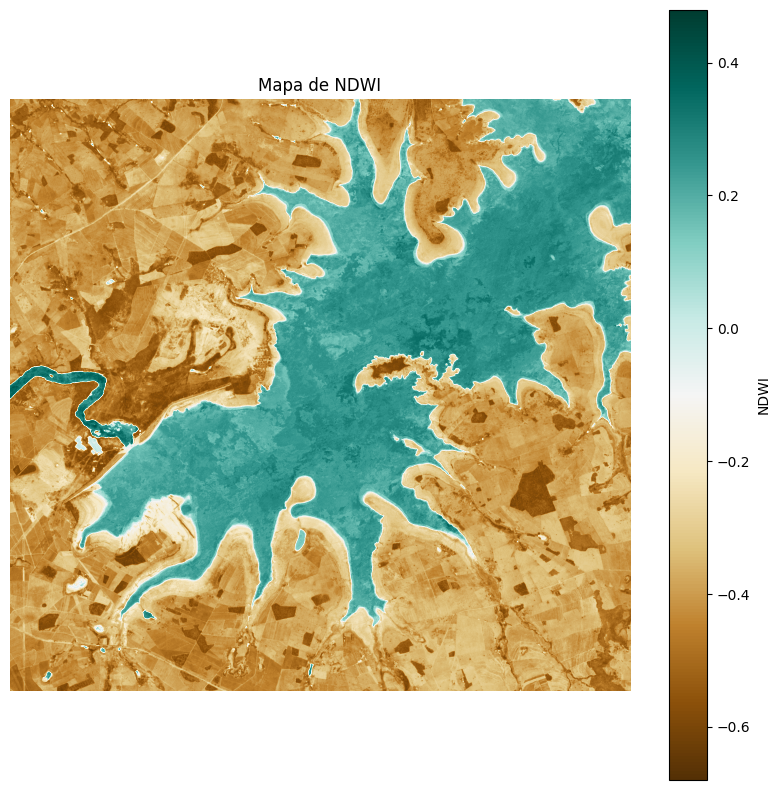

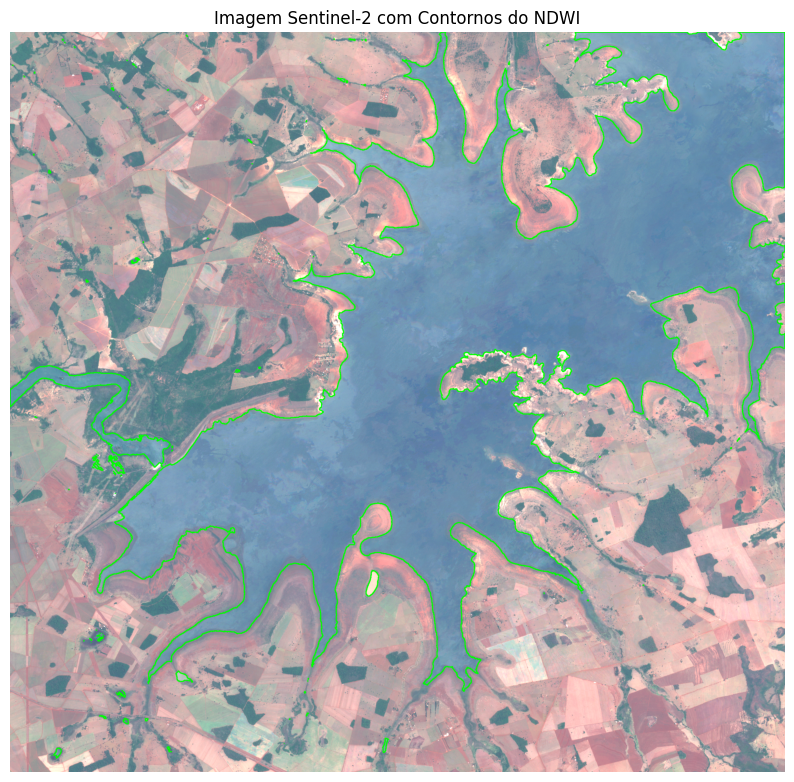

In [ ]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np
import cv2


filename = '/content/drive/MyDrive/ content/Sentinel2_1907.tif'
with rasterio.open(filename) as src:
    red = src.read(1)
    green = src.read(2)
    blue = src.read(3)
    nir = src.read(4)

    rgb = np.stack([red, green, blue], axis=-1)

    rgb = rgb.astype(float)
    rgb = np.clip(rgb / np.percentile(rgb, 99), 0, 1)

    ndwi = (green.astype(float) - nir.astype(float)) / (green + nir)

    ndwi_mask = ndwi > 0

    rgb_masked = np.zeros_like(rgb)
    rgb_masked[ndwi_mask] = rgb[ndwi_mask]

    rgb_masked = rgb_masked.astype(float)
    rgb_masked = np.clip(rgb_masked / np.percentile(rgb_masked, 99), 0, 1)

    ndwi_mask_uint8 = (ndwi_mask * 255).astype(np.uint8)

mascara_rio = ndwi_mask > 0

def desenhar_contornos(imagem, mascara):
    imagem_com_contornos = imagem.copy()
    contornos, _ = cv2.findContours(mascara.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cv2.drawContours(imagem_com_contornos, contornos, -1, (0, 255, 0), 2)
    return imagem_com_contornos

imagem_com_contornos = desenhar_contornos(rgb, mascara_rio)

plt.figure(figsize=(10, 10))
plt.imshow(rgb)
plt.axis('off')
plt.title("Imagem Sentinel-2 em RGB com Máscara de NDWI")
plt.show()

plt.figure(figsize=(10, 10))
plt.imshow(ndwi, cmap='BrBG')
plt.colorbar(label='NDWI')
plt.axis('off')
plt.title("Mapa de NDWI")
plt.show()

plt.figure(figsize=(10, 10))
plt.imshow(imagem_com_contornos)
plt.axis('off')
plt.title("Imagem Sentinel-2 com Contornos do NDWI")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━

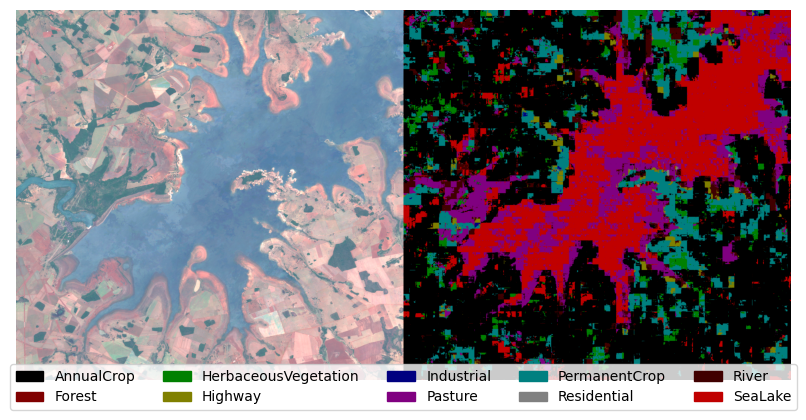

In [ ]:
from PIL import Image
import tensorflow as tf
import json

model = tf.keras.models.load_model('/content/drive/MyDrive/ content/1023-2.h5')

colors = [
    [0, 0, 0], [128, 0, 0], [0, 128, 0], [128, 128, 0], [0, 0, 128],
    [128, 0, 128], [0, 128, 128], [128, 128, 128], [64, 0, 0], [192, 0, 0]
]

def map_classes_to_colors(pred_mask):
    seg_img = np.zeros((pred_mask.shape[0], pred_mask.shape[1], 3), dtype=np.uint8)
    for class_idx, color in enumerate(colors):
        seg_img[pred_mask == class_idx] = color
    return Image.fromarray(seg_img)

def segment_image_with_dynamic_padding(model, rgb, block_size=(64, 64), overlap=32):
    img = Image.fromarray((rgb * 255).astype(np.uint8))
    img_width, img_height = img.size
    segmented_image = Image.new('RGB', img.size)

    step_x = block_size[0] - overlap
    step_y = block_size[1] - overlap

    for y in range(0, img_height, step_y):
        for x in range(0, img_width, step_x):
            x_end = min(x + block_size[0], img_width)
            y_end = min(y + block_size[1], img_height)

            block = img.crop((x, y, x_end, y_end))
            block_array = np.array(block) / 255.0

            if block_array.shape[0] != block_size[1] or block_array.shape[1] != block_size[0]:
                block_array = cv2.resize(block_array, block_size, interpolation=cv2.INTER_LINEAR)

            pred_mask = model.predict(np.expand_dims(block_array, axis=0))[0]
            pred_mask = np.argmax(pred_mask, axis=-1)

            if (x_end - x) != block_size[0] or (y_end - y) != block_size[1]:
                segmented_block = cv2.resize(pred_mask, ((x_end - x), (y_end - y)), interpolation=cv2.INTER_NEAREST)
            else:
                segmented_block = pred_mask

            segmented_block_img = map_classes_to_colors(segmented_block)
            segmented_image.paste(segmented_block_img, (x, y))

    return segmented_image



def display_segmentation_with_legend(original_image, segmented_image, label_map):
    fig, ax = plt.subplots(figsize=(10, 10))

    combined_width = original_image.width + segmented_image.width
    combined_img = Image.new('RGB', (combined_width, original_image.height))
    combined_img.paste(original_image, (0, 0))
    combined_img.paste(segmented_image, (original_image.width, 0))

    ax.imshow(combined_img)
    ax.axis('off')

    patches = [plt.Rectangle((0, 0), 1, 1, color=np.array(color) / 255.0) for color in colors]
    plt.legend(patches, label_map.keys(), loc='lower center', ncol=5, bbox_to_anchor=(0.5, -0.1))
    plt.show()

with open("/content/drive/MyDrive/ content/label_map.json", 'r') as f:
    label_map = json.load(f)


segmented_image = segment_image_with_dynamic_padding(model, rgb)

original_img = Image.fromarray((rgb * 255).astype(np.uint8))
display_segmentation_with_legend(original_img, segmented_image, label_map)

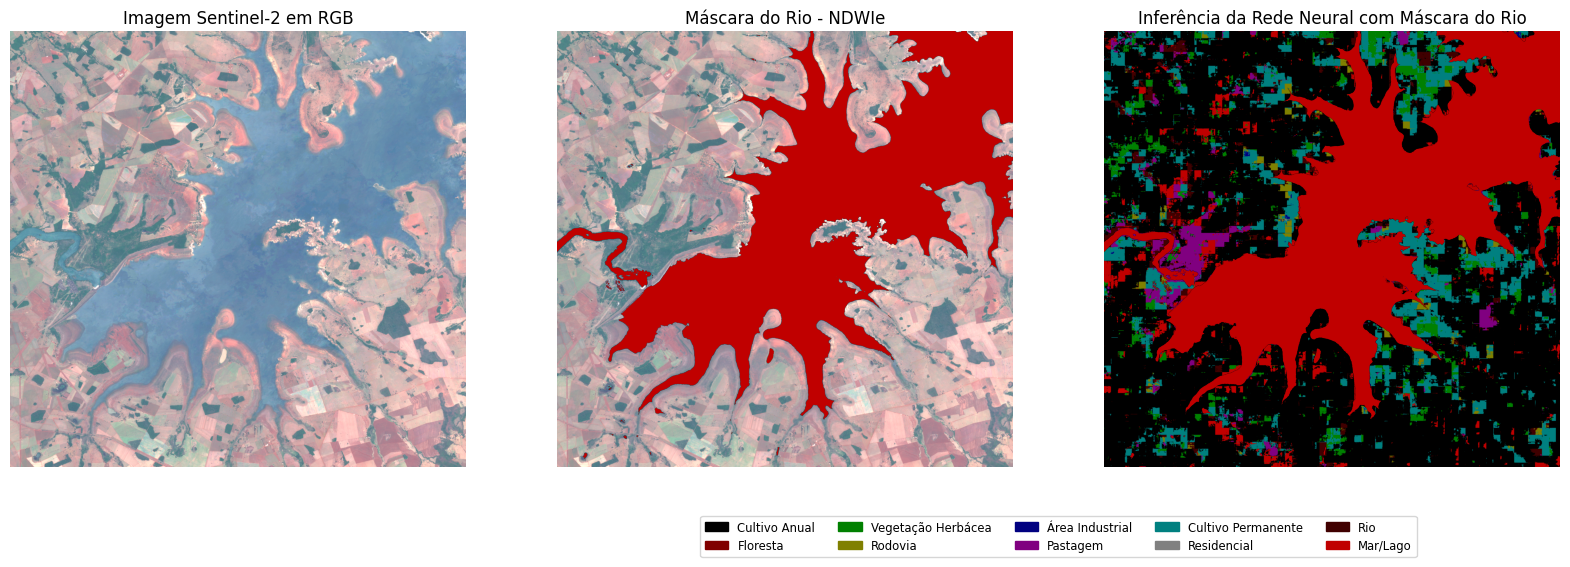

In [ ]:
ndwi_mask_rgba = np.zeros((*ndwi_mask.shape, 4), dtype=np.uint8)
ndwi_mask_rgba[ndwi_mask] =  [192, 0, 0, 255]
ndwi_mask_rgba[~ndwi_mask] = [0, 0, 0, 0]

fig, axs = plt.subplots(1, 3, figsize=(20, 10))

axs[0].imshow(rgb)
axs[0].axis('off')
axs[0].set_title("Imagem Sentinel-2 em RGB")

axs[1].imshow(rgb)
axs[1].imshow(ndwi_mask_rgba)
axs[1].axis('off')
axs[1].set_title("Máscara do Rio - NDWIe")

axs[2].imshow(segmented_image)
axs[2].imshow(ndwi_mask_rgba)
axs[2].axis('off')
axs[2].set_title("Inferência da Rede Neural com Máscara do Rio")

label_map = {
    "Cultivo Anual": [0, 0, 0],
    "Floresta": [128, 0, 0],
    "Vegetação Herbácea": [0, 128, 0],
    "Rodovia": [128, 128, 0],
    "Área Industrial": [0, 0, 128],
    "Pastagem": [128, 0, 128],
    "Cultivo Permanente": [0, 128, 128],
    "Residencial": [128, 128, 128],
    "Rio": [64, 0, 0],
    "Mar/Lago": [192, 0, 0]
}
from matplotlib.patches import Patch
patches = [Patch(color=np.array(color) / 255.0, label=label) for label, color in label_map.items()]

plt.legend(handles=patches, loc='upper center', bbox_to_anchor=(-0.1, -0.1), ncol=5, fontsize='small')

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━

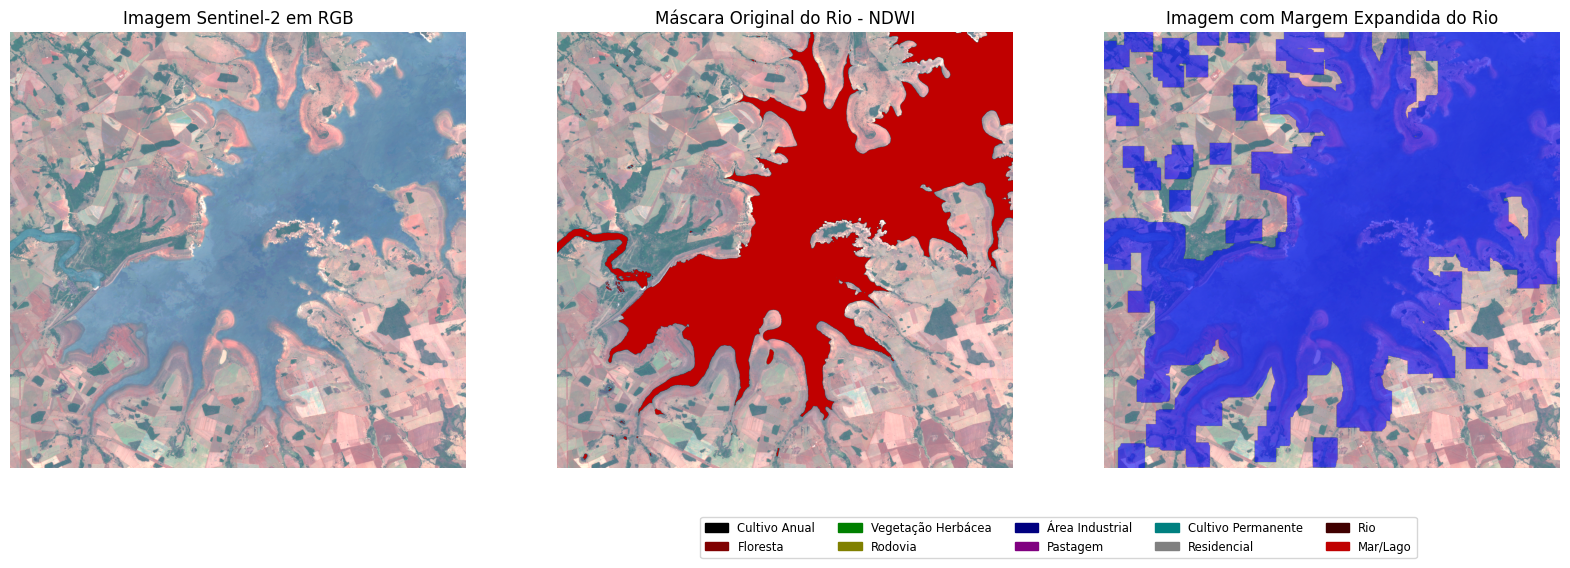

In [ ]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL import Image
import tensorflow as tf
import json

filename = '/content/drive/MyDrive/ content/Sentinel2_1907.tif'
with rasterio.open(filename) as src:
    red = src.read(1)
    green = src.read(2)
    blue = src.read(3)
    nir = src.read(4)

    rgb = np.stack([red, green, blue], axis=-1)
    rgb = rgb.astype(float)
    rgb = np.clip(rgb / np.percentile(rgb, 99), 0, 1)

    ndwi = (green.astype(float) - nir.astype(float)) / (green + nir)
    ndwi_mask = ndwi > 0

    rgb_masked = np.zeros_like(rgb)
    rgb_masked[ndwi_mask] = rgb[ndwi_mask]
    rgb_masked = rgb_masked.astype(float)
    rgb_masked = np.clip(rgb_masked / np.percentile(rgb_masked, 99), 0, 1)

    ndwi_mask_uint8 = (ndwi_mask * 255).astype(np.uint8)

# Margem do rio expandida
proporcao_pixels = int((500 / 10000) * rgb.shape[0])  # Calcula 5% do tamanho da imagem
margem_rio_expandida = cv2.dilate(ndwi_mask_uint8, np.ones((proporcao_pixels, proporcao_pixels), np.uint8))

def desenhar_contornos(imagem, mascara):
    imagem_com_contornos = imagem.copy()
    contornos, _ = cv2.findContours(mascara.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cv2.drawContours(imagem_com_contornos, contornos, -1, (0, 255, 0), 2)
    return imagem_com_contornos

imagem_com_contornos = desenhar_contornos(rgb, ndwi_mask_uint8)

# Carrega o modelo de segmentação e outras configurações
model = tf.keras.models.load_model('/content/drive/MyDrive/ content/1023-2.h5')

colors = [
    [0, 0, 0], [128, 0, 0], [0, 128, 0], [128, 128, 0], [0, 0, 128],
    [128, 0, 128], [0, 128, 128], [128, 128, 128], [64, 0, 0], [192, 0, 0]
]

def map_classes_to_colors(pred_mask):
    seg_img = np.zeros((pred_mask.shape[0], pred_mask.shape[1], 3), dtype=np.uint8)
    for class_idx, color in enumerate(colors):
        seg_img[pred_mask == class_idx] = color
    return Image.fromarray(seg_img)

def segment_image_with_dynamic_padding(model, rgb, block_size=(64, 64), overlap=32):
    img = Image.fromarray((rgb * 255).astype(np.uint8))
    img_width, img_height = img.size
    segmented_image = Image.new('RGB', img.size)

    step_x = block_size[0] - overlap
    step_y = block_size[1] - overlap

    for y in range(0, img_height, step_y):
        for x in range(0, img_width, step_x):
            x_end = min(x + block_size[0], img_width)
            y_end = min(y + block_size[1], img_height)

            block = img.crop((x, y, x_end, y_end))
            block_array = np.array(block) / 255.0

            if block_array.shape[0] != block_size[1] or block_array.shape[1] != block_size[0]:
                block_array = cv2.resize(block_array, block_size, interpolation=cv2.INTER_LINEAR)

            pred_mask = model.predict(np.expand_dims(block_array, axis=0))[0]
            pred_mask = np.argmax(pred_mask, axis=-1)

            if (x_end - x) != block_size[0] or (y_end - y) != block_size[1]:
                segmented_block = cv2.resize(pred_mask, ((x_end - x), (y_end - y)), interpolation=cv2.INTER_NEAREST)
            else:
                segmented_block = pred_mask

            segmented_block_img = map_classes_to_colors(segmented_block)
            segmented_image.paste(segmented_block_img, (x, y))

    return segmented_image

with open("/content/drive/MyDrive/ content/label_map.json", 'r') as f:
    label_map = json.load(f)

segmented_image = segment_image_with_dynamic_padding(model, rgb)

ndwi_mask_rgba = np.zeros((*ndwi_mask.shape, 4), dtype=np.uint8)
ndwi_mask_rgba[ndwi_mask] = [192, 0, 0, 255]
ndwi_mask_rgba[~ndwi_mask] = [0, 0, 0, 0]

margem_rio_rgba = np.zeros((*margem_rio_expandida.shape, 4), dtype=np.uint8)
margem_rio_rgba[margem_rio_expandida > 0] = [0, 0, 255, 150]  # cor azul translúcida para margem do rio

fig, axs = plt.subplots(1, 3, figsize=(20, 10))

axs[0].imshow(rgb)
axs[0].axis('off')
axs[0].set_title("Imagem Sentinel-2 em RGB")

axs[1].imshow(rgb)
axs[1].imshow(ndwi_mask_rgba)
axs[1].axis('off')
axs[1].set_title("Máscara Original do Rio - NDWI")

axs[2].imshow(segmented_image)
axs[2].imshow(margem_rio_rgba)
axs[2].axis('off')
axs[2].set_title("Imagem com Margem Expandida do Rio")

label_map = {
    "Cultivo Anual": [0, 0, 0],
    "Floresta": [128, 0, 0],
    "Vegetação Herbácea": [0, 128, 0],
    "Rodovia": [128, 128, 0],
    "Área Industrial": [0, 0, 128],
    "Pastagem": [128, 0, 128],
    "Cultivo Permanente": [0, 128, 128],
    "Residencial": [128, 128, 128],
    "Rio": [64, 0, 0],
    "Mar/Lago": [192, 0, 0]
}

from matplotlib.patches import Patch
patches = [Patch(color=np.array(color) / 255.0, label=label) for label, color in label_map.items()]
plt.legend(handles=patches, loc='upper center', bbox_to_anchor=(-0.1, -0.1), ncol=5, fontsize='small')

plt.show()


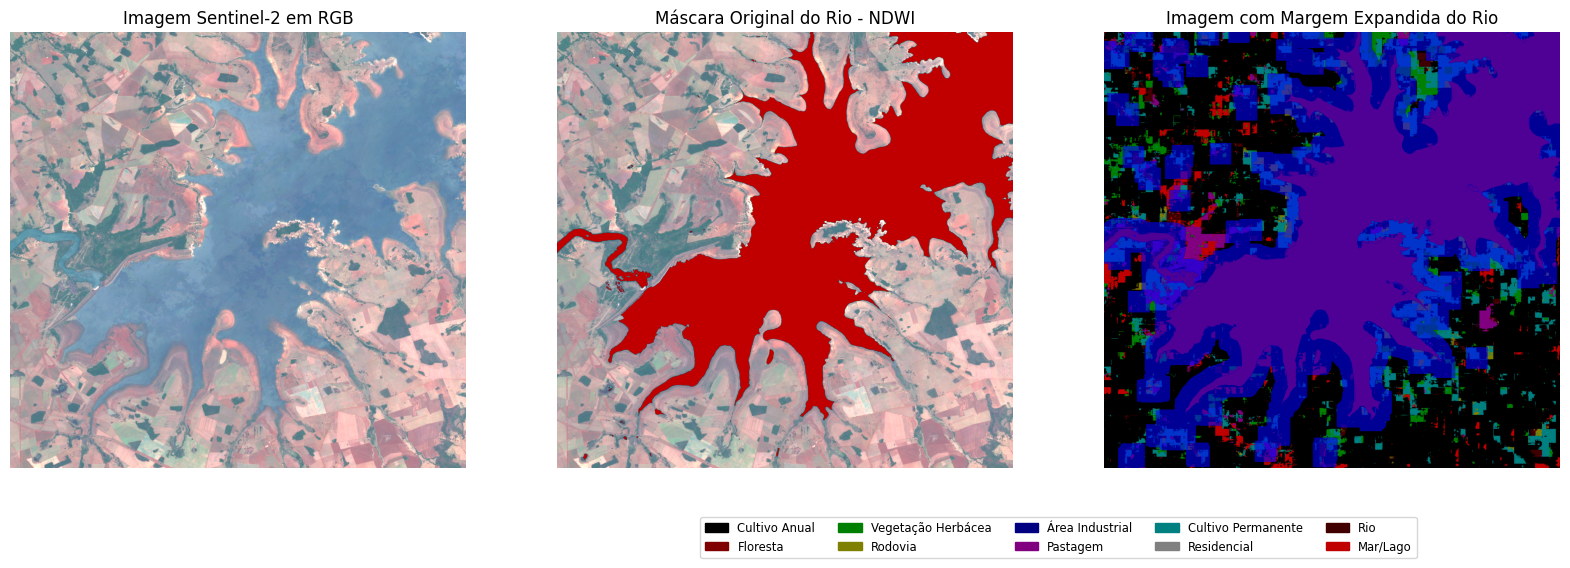

In [ ]:

fig, axs = plt.subplots(1, 3, figsize=(20, 10))

axs[0].imshow(rgb)
axs[0].axis('off')
axs[0].set_title("Imagem Sentinel-2 em RGB")

axs[1].imshow(rgb)
axs[1].imshow(ndwi_mask_rgba)
axs[1].axis('off')
axs[1].set_title("Máscara Original do Rio - NDWI")

axs[2].imshow(segmented_image)
axs[2].imshow(ndwi_mask_rgba)
axs[2].imshow(margem_rio_rgba)
axs[2].axis('off')
axs[2].set_title("Imagem com Margem Expandida do Rio")

label_map = {
    "Cultivo Anual": [0, 0, 0],
    "Floresta": [128, 0, 0],
    "Vegetação Herbácea": [0, 128, 0],
    "Rodovia": [128, 128, 0],
    "Área Industrial": [0, 0, 128],
    "Pastagem": [128, 0, 128],
    "Cultivo Permanente": [0, 128, 128],
    "Residencial": [128, 128, 128],
    "Rio": [64, 0, 0],
    "Mar/Lago": [192, 0, 0]
}

from matplotlib.patches import Patch
patches = [Patch(color=np.array(color) / 255.0, label=label) for label, color in label_map.items()]
plt.legend(handles=patches, loc='upper center', bbox_to_anchor=(-0.1, -0.1), ncol=5, fontsize='small')

plt.show()